In [191]:
# make values to eval on.
import numpy as np
import random
ran = np.random.rand(1000000,6) 
sample_points = np.random.rand(1000,6) 

In [81]:
# import qdf samples
import sys
sys.path.append('..')
import numpy as np
samples = np.load('../mock_data/qdf/data/sampleV_at_(0.0,0.0,0.0)_epsilon=0.5.npy')

In [129]:
# 1. QDF
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleAdiabatic
from galpy.df import quasiisothermaldf
aA= actionAngleAdiabatic(pot=MWPotential2014,c=True)


from galpy.util.bovy_coords import *

qdf= quasiisothermaldf(1./3.,0.2,0.1,1.,1.,pot=MWPotential2014,aA=aA,cutcounter=True)

In [83]:
qdf(1.,0.1,1.1,0.1,0.)

array([ 16.86790643])

In [84]:
qdf(0.,0.,0.,0.,0.)

array([ 0.])

In [183]:
# 2. KDE
#Importing the required modules for KDE
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import iqr

def generate_KDE(inputs, ker, v_scale):
    #Scaling velocities with v_scale
    positions, velocities = np.hsplit(inputs, 2)
    velocities_scaled = velocities*v_scale
    inputs = np.hstack((positions, velocities_scaled))
    
    #Optimizing bandwidth in terms of Scott's Rule of Thumb
    shape_string = str(inputs.shape)
    objects, parameters = shape_string.split(', ')
    N_string = objects[1:]
    N = int(N_string)
    IQR = iqr(inputs)
    A = min(np.std(inputs), IQR/1.34)
    bw = 1.059 * A * N ** (-1/5.)
    
    #Fit data points to selected kernel and bandwidth
    kde = KernelDensity(kernel=ker, bandwidth=bw).fit(inputs)  
    return kde

def input_KDE(samples, kde, v_scale):
    #To correct the type of information from other functions into acceptable input
    samples = np.array(samples)
        
     #Scaling samples with v_scale
    samp_positions, samp_velocities = np.hsplit(samples, 2)
    samp_velocities_scaled = samp_velocities*v_scale
    samples = np.hstack((samp_positions, samp_velocities_scaled))
        
    #Get the log density for selected samples and apply exponential to get normal probabilities
    log_dens = kde.score_samples(samples)
    dens = np.exp(log_dens)
        
    #Return a 1xQ array of normal probabilities for the selected sample
    return dens
    


In [157]:
samples_qdf = np.load('../mock_data/qdf/data/sampleV_at_(0.0,0.0,0.0)_epsilon=0.5.npy')

#convert cylindrical to rectangular
x, y, z = cyl_to_rect(samples_qdf[:,0], samples_qdf[:,1], samples_qdf[:,2])
vx, vy, vz = cyl_to_rect_vec(samples_qdf[:,3], samples_qdf[:,4], samples_qdf[:,5], samples_qdf[:,1])
samples_qdf = np.stack((x, y, z, vx, vy, vz), axis=1)


print('#stars', len(samples_qdf))
print('min/max/mean (x)', min(samples_qdf[:,0]), max(samples_qdf[:,0]), np.mean(samples_qdf[:,0]))
print('min/max/mean (y)', min(samples_qdf[:,1]), max(samples_qdf[:,1]), np.mean(samples_qdf[:,0]))
print('min/max/mean (z)', min(samples_qdf[:,2]), max(samples_qdf[:,2]), np.mean(samples_qdf[:,0]))
print('min/max/mean (vx)', min(samples_qdf[:,3]), max(samples_qdf[:,3]), np.mean(samples_qdf[:,0]))
print('min/max/mean (vy)', min(samples_qdf[:,4]), max(samples_qdf[:,4]), np.mean(samples_qdf[:,0]))
print('min/max/mean (vz)', min(samples_qdf[:,5]), max(samples_qdf[:,5]), np.mean(samples_qdf[:,0]))

#stars 1699708
min/max/mean (x) 0.900745306404 1.0163069654 0.957604602066
min/max/mean (y) 0.372132086095 0.422068087 0.957604602066
min/max/mean (z) -0.0590301240362 0.0656483040402 0.957604602066
min/max/mean (vx) -260.936202178 170.664224015 0.957604602066
min/max/mean (vy) -6.85088036929 294.032239252 0.957604602066
min/max/mean (vz) -78.6318475051 79.4952977672 0.957604602066


In [145]:
samples_ddf = np.load('../mock_data/dehnendf/data/1699708samples_3.0813469383936956-3.2018352601712126rad_7.800911997788074-8.799620277350543kpc.npy')
print('#stars', len(samples_ddf))
print('min/max/mean (x)', min(samples_ddf[:,0]), max(samples_ddf[:,0]), np.mean(samples_qdf[:,0]))
print('min/max/mean (y)', min(samples_ddf[:,1]), max(samples_ddf[:,1]), np.mean(samples_qdf[:,0]))
print('min/max/mean (z)', min(samples_ddf[:,2]), max(samples_ddf[:,2]), np.mean(samples_qdf[:,0]))
print('min/max/mean (vx)', min(samples_ddf[:,3]), max(samples_ddf[:,3]), np.mean(samples_qdf[:,0]))
print('min/max/mean (vy)', min(samples_ddf[:,4]), max(samples_ddf[:,4]), np.mean(samples_qdf[:,0]))
print('min/max/mean (vz)', min(samples_ddf[:,5]), max(samples_ddf[:,5]), np.mean(samples_qdf[:,0]))

#stars 1699708
min/max/mean (x) -12.3336813864 -3.68920230051 0.957604602066
min/max/mean (y) -0.704801501565 0.67050998086 0.957604602066
min/max/mean (z) -1.52609095465 1.5655696659 0.957604602066
min/max/mean (vx) -133.336430276 129.754301877 0.957604602066
min/max/mean (vy) -310.196982081 -98.2865069945 0.957604602066
min/max/mean (vz) -90.5724902592 89.5936405577 0.957604602066


In [186]:
kde_qdf = generate_KDE(samples_qdf, 'epanechnikov', 0.1)


In [187]:
kde_ddf = generate_KDE(samples_ddf, 'epanechnikov', 0.1)

In [194]:
#use pickle to save objects
import pickle
pickle.dump(kde_qdf, open("kde_qdf_1699708_stars.p", "wb"), pickle.HIGHEST_PROTOCOL)
pickle.dump(kde_ddf, open("kde_ddf_1699708_stars.p", "wb"), pickle.HIGHEST_PROTOCOL)
pickle.dump(ran_kde, open("test.p", "wb"), pickle.HIGHEST_PROTOCOL)



e


In [165]:
samples_ddf.shape

(1699708, 6)

In [156]:
a = pickle.load(open("kde_ddf_1699708_stars.p", "rb"))

EOFError: Ran out of input

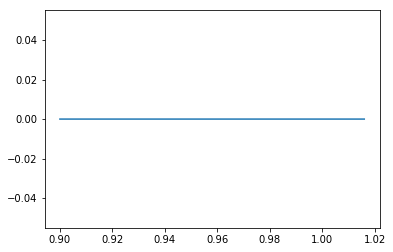

In [198]:
#plot qdf in x dim
x = np.linspace(0.9, 1.016, 1000000)
a = [0] * 1000000
points = np.stack((x, a, a, a, a, a), axis=1)
y = input_KDE(points, kde_qdf, 0.1)
plt.plot(x, y)
plt.show()

In [177]:
input_KDE([[0,0,0,0,0,0], [0,0,0,0,1,1]], kde_qdf, 0.1)

array([ 0.,  0.])

In [192]:
ran_kde = generate_KDE(ran, 'epanechnikov', 0.1)

In [181]:
ran

array([[ 0.16956711,  0.53945821,  0.95860095,  0.03481185,  0.55335712,
         0.00804016],
       [ 0.26480854,  0.67555418,  0.21376751,  0.5624344 ,  0.3628427 ,
         0.99152896],
       [ 0.33044671,  0.98771319,  0.33865575,  0.89133357,  0.0714186 ,
         0.73032541],
       ..., 
       [ 0.11376261,  0.82750637,  0.22714483,  0.08449541,  0.71943628,
         0.46625321],
       [ 0.883808  ,  0.27334215,  0.15887061,  0.62001938,  0.40068772,
         0.86404164],
       [ 0.73691577,  0.94029976,  0.52736352,  0.9958244 ,  0.60143441,
         0.78232885]])